<a href="https://colab.research.google.com/github/viv-bad/pytorch-course/blob/master/03_pytorch_computer_vision_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0.1 Computer vision libraries in PyTorch

* `torchvision` - base/main computer vision library in PyTorch
* `torchvision.datasets` - get datasets and data loading functions for computer vision
* `torchvision.models` - pretrained computer vision models that you can leverage for your own problems
* `torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for use with an ML model.
* `torch.utils.data.Dataset` - to create our own dataset with out own data, we have the base class for this in PyTorch
* `torch.utils.data.DataLoader` - Creates a Python iterable over a dataset.




In [ ]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
import torchvision.transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt
print (torch.__version__)
print (torchvision.__version__)

# Setup device agnostic code
import torch
device = 'cuda' if torch.cuda.is_available() else "cpu"

device

2.6.0+cu124
0.21.0+cu124


'cuda'

In [ ]:
### 1. Setup training data
train_data = datasets.FashionMNIST(
    root="data", #where to download data to
    train=True, # do we want the training dataset/testing dataset
    download=True, #do we want to download it
    transform=ToTensor(),
    target_transform=None, #do we want to transform the target data/labels
)

test_data = datasets.FashionMNIST(
    root="data", #where to download data to
    train=False, # do we want the training dataset/testing dataset
    download=True, #do we want to download it
    transform=ToTensor(),
    target_transform=None, #do we want to transform the target data/labels
)




In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
# See the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx #we have 10 different items of clothing, so output shape must be 10

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
# Check the shape of our image
print(f"Image shape: {image.shape} -> [color_channels, height, width]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Ankle boot


### 1.2 Visualising our data

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9,  Ankle boot')

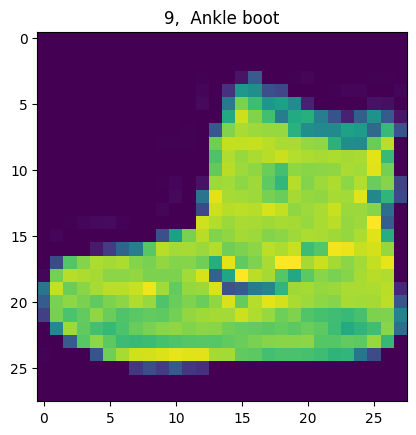

In [ ]:
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze()) # matplotlib expects [height, width, colour_channel], so squeeze to get rid of colour channel dimension
plt.title(f"{label},  {class_names[label]}")

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

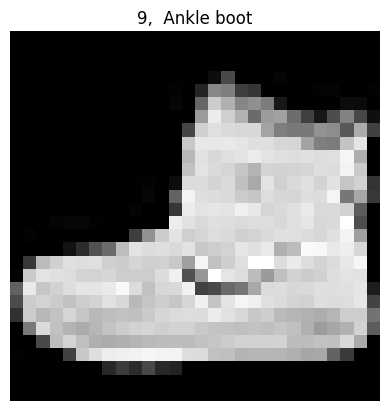

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(f"{label},  {class_names[label]}")
plt.axis(False)

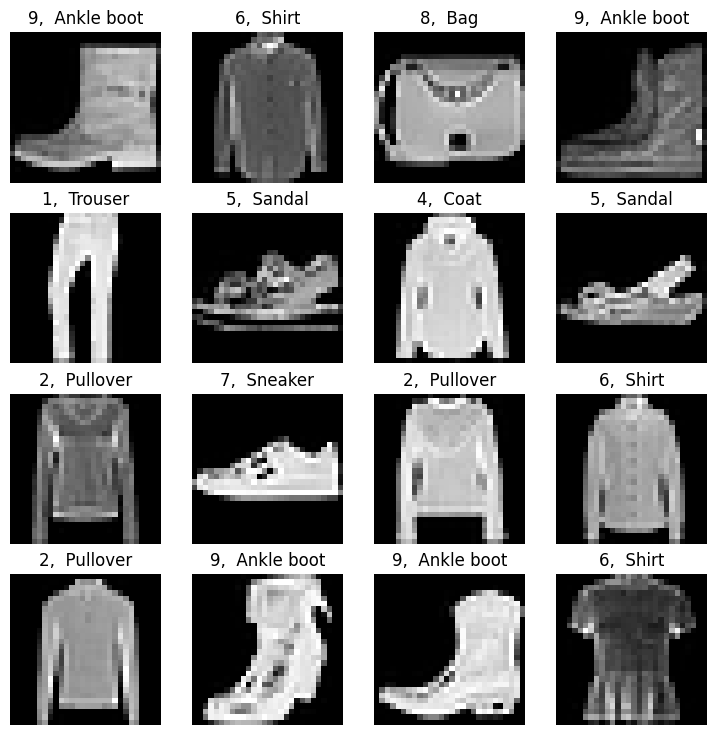

In [ ]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(f"{label},  {class_names[label]}")
  plt.axis(False)

Do you think these items of clothing (images) could be modelled with pure linear lines? Or do we need non linearity

## 2. Prepare DataLoader

Right now, our data is in the form of PyTorch Datasets.

DataLoader turns our dataset into a Python iterable.

More specifically, we want to turn our data into batches (or mini-batches).

Why?

1. It is more computationally efficient, as in your comp hardware may not be able to look (store in memory) all the images in one hit. So break it down to 32 images at one time (batch_size=32).

2. It gives our neural network more chances to update its gradients per epoch.


In [ ]:
# Turn train dataset into DataLoader
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True) # shuffle training data to remove order, so training data doesn't have order
test_dataloader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=False)# don't shuffle test/eval data, it's good to have the data in the same order. our model will never actually see the test data during training anyway

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7b6c862fb1d0>,
 <torch.utils.data.dataloader.DataLoader at 0x7b6c8033cb10>)

In [ ]:
# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)}, batches of {BATCH_SIZE}")
print(f"Length of test_dataloader: {len(test_dataloader)}, batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7b6c862fb1d0>, <torch.utils.data.dataloader.DataLoader object at 0x7b6c8033cb10>)
Length of train_dataloader: 1875, batches of 32
Length of test_dataloader: 313, batches of 32


In [ ]:
# Check out what's inside train dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


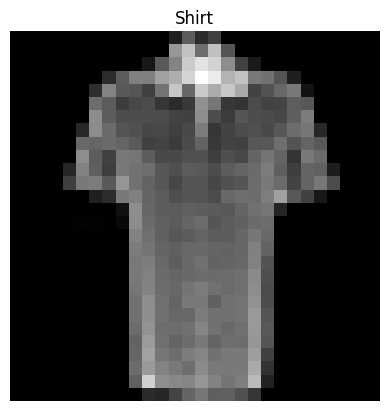

In [ ]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Model 0: Build a baseline model

When starting to build a series of ML. modelling experiments, always start with a baseline model.

A baseline model is a simple model you will try to improve upon with subsequent models/experiments.

Start simple and add complexity when necessary.

In [ ]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]
x.shape

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [colour_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [colour_channels, height*width]") # now after flattening we have one value per pixel (height*width)


Shape before flattening: torch.Size([1, 28, 28]) -> [colour_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [colour_channels, height*width]


In [ ]:
from torch import nn

class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)

# Set up model with input params

model_0 = FashionMNISTModelV0(input_shape=784, #28x28
                              hidden_units=10,
                              output_shape=len(class_names) #one for every class

                              ).to(device)

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand([1,1,28,28]).to(device)
model_0(dummy_x) # output of logits

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]],
                     device='cuda:0')),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163], device='cuda:0')),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0

### 3.1 Setup loss, optimizer and evaluation metrics

* Loss function - since we're working with multiclass data, our loss function is `nn.CrossEntropyLoss()`
* Optimizer - we will stick with `torch.optim.SGD()` (stochastic gradient descent)
* Evaluation metric - since we're working on a classification problem, let's use accuracy as our evaluation metric.


In [ ]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [ ]:
from helper_functions import accuracy_fn

# Setup loss function and optimizer

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

### 3.2 Creating a function to time our experiments

Machine learning is very experimental.

Two main things to track are:

1. Model's performance (loss, accuracy etc)
2. How fast it runs




In [ ]:
from timeit import default_timer as timer

def print_train_time(start: float, end: float, device: torch.device = None):
  """
  Prints difference between start and end time"""

  total_time = end-start

  print(f"Train time on {device}: {total_time: .3f} seconds")
  return total_time

In [ ]:
start_time = timer()

end_time = timer()

print_train_time(start=start_time, end=end_time, device=device)


Train time on cuda:  0.000 seconds


3.1088000014278805e-05

### 3.3 Creating a training loop and training a model on batches of data

1. Loop through epochs
2. Loop through training batches, perform training steps, calculate the train loss *per batch*
3. Loop through testing batches, perform testing steps, calculate test loss *per batch*
4. Print out what's happening
5. Time is all

In [ ]:
# Import tqdm for a progress bar
from tqdm.auto import tqdm

# set seed and start timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set number of epochs (we'll keep it small for faster training time)
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----")
  ### Training
  train_loss = 0
  # Add loop to loop thorugh training batches
  for batch, (X, y) in enumerate(train_dataloader):
    X, y = X.to(device), y.to(device)
    model_0.train()

    # 1. Forward pass
    y_pred = model_0(X)

    # 2. Calculate loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate train loss

    # 3. optimizer zero grad
    optimizer.zero_grad()

    # 4.  Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Print progress only every 400 batches
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

  # Divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)

  ### Testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      X_test, y_test = X_test.to(device), y_test.to(device)
      # 1. forward pass - FIXED: Using X_test instead of X
      test_pred = model_0(X_test)

      # 2. Calculate loss accumulatively
      test_loss += loss_fn(test_pred, y_test)

      # 3. Calculate accuracy
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    # Calculate test loss average per batch
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  # Print out
  print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")

# Calculate training time - FIXED: Made device agnostic
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(
    start=train_time_start_on_cpu,
    end=train_time_end_on_cpu,
    device=next(model_0.parameters()).device  # Get the actual device the model is on
)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.5904 | Test loss: 0.5095, Test acc: 82.0387
Epoch: 1
-----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.4763 | Test loss: 0.4799, Test acc: 83.1969
Epoch: 2
-----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.4550 | Test loss: 0.4766, Test acc: 83.4265
Train time on cuda:0:  28.863 seconds


## 4.  Make predictions and get Model 0 results


In [ ]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module, data_loader: torch.utils.data.DataLoader, loss_fn: torch.nn.Module, accuracy_fn, device):
  """Returns a dict containing the results of model predicting on data_loader"""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)
      # make predictions
      y_pred = model(X)

      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    # Scale loss and acc to find average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  # Handle both tensor and float types appropriately
  result = {"model_name": model.__class__.__name__}

  # Check if loss is a tensor or float
  if isinstance(loss, torch.Tensor):
    result["model_loss"] = loss.item()
  else:
    result["model_loss"] = loss

  # Check if acc is a tensor or float
  if isinstance(acc, torch.Tensor):
    result["model_acc"] = acc.item()
  else:
    result["model_acc"] = acc

  return result


In [ ]:

# Calculate model - results on test dataset
model_0_results = eval_model(model=model_0, data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn, device=device)

model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [ ]:
# Setup device agnostic code
import torch
device = 'cuda' if torch.cuda.is_available() else "cpu"

device

'cuda'

## Modal 1: Building a better model with non-linearity

We learned about the power of non-linearity in notebook 2.

In [ ]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)

model_1 = FashionMNISTModelV1(input_shape=784, #28x28
                              hidden_units=10,
                              output_shape=len(class_names) #one for every class

                              ).to(device)

next(model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
from helper_functions import accuracy_fn

# Setup loss function and optimizer

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

### 6.2 Functionizing training and testing loops

In [ ]:
def train_step(model: torch.nn.Module, data_loader: torch.utils.data.DataLoader, loss_fn: torch.nn.Module, optimizer: torch.optim.Optimizer, accuracy_fn, device: torch.device = device):
  """Performs training step with model trying to learn on data_loader"""
  train_loss, train_acc = 0,0
  model.train()
  for batch, (X, y) in enumerate(data_loader):
    # Put data on target device
    X, y = X.to(device), y.to(device)

    y_pred = model(X)

    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true = y, y_pred = y_pred.argmax(dim=1))

    optimizer.zero_grad()


    loss.backward()


    optimizer.step()

        # Print progress only every 400 batches
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

  # Divide total train loss by length of train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)

  print(f"Train loss: {train_loss : .5f} | Train acc: {train_acc : .2f} %")


In [ ]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device):
    """Performs a testing loop step on model going over data_loader"""

    test_loss, test_acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # send to device
            X, y = X.to(device), y.to(device)

            # 1. forward pass
            test_pred = model(X)

            # 2. Calculate loss accumulatively
            test_loss += loss_fn(test_pred, y)

            # 3. Calculate accuracy
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        # Calculate test loss average per batch
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)

    # Print out (removing train_loss reference since it's not available here)
    print(f"\nTest loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

    return test_loss, test_acc

In [ ]:
torch.manual_seed(42)

train_time_start_on_gpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n--------")
  train_step(model=model_1, data_loader=train_dataloader, loss_fn=loss_fn, optimizer = optimizer, accuracy_fn = accuracy_fn, device = device)
  test_step(model=model_1, data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn = accuracy_fn, device = device)

train_time_end_on_gpu = timer()

total_train_time_model_1 = print_train_time(
    start=train_time_start_on_gpu,
    end=train_time_end_on_gpu,
    device=device # Get the actual device the model is on
)



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
--------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss:  1.09199 | Train acc:  61.34 %

Test loss: 0.95636, Test acc: 65.00%
Epoch: 1
--------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss:  0.78101 | Train acc:  71.93 %

Test loss: 0.72227, Test acc: 73.91%
Epoch: 2
--------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss:  0.67027 | Train acc:  75.94 %

Test loss: 0.68500, Test acc: 75.02%
Train time on cuda:  27.624 seconds


>**Note:** Sometimes, depending on your data/hardware, you might find that your model trains faster on CPU than GPU.
?Why is this?

>1. It could be that the overhead for copying data/model to and from GPU outweighs the compute benefits offered by the GPU.
>2. The hardware you're using has a better CPU in terms of compute capability than the GPU (unlikely).


In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [ ]:
total_train_time_model_0

28.863179435999996

In [ ]:
# Get model_1 results dictionary
model_1_results = eval_model(model=model_1, data_loader = test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn, device=device)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

## Model 2: Building a Convolutional Neural Network (CNN)

CNN's are also known as ConvNets.

CNN's are known for their capabilities to find patterns in visual data.

More layers = more chance to find patterns in data

In [ ]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
  """Model Architecture that replicates the TinyVGG mpdel from the CNN explainer website."""
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2) #takes the max value of the input and outputs it
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2) #takes the max value of the input and outputs it
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units, # There's a trick to calculating this
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    print(x.shape)
    x = self.conv_block_2(x)
    print(x.shape)
    x = self.classifier(x)
    return x

In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, #black and white image, so only one colour channel, colour = 3
                              hidden_units=10,
                              output_shape=len(class_names)
                              ).to(device)

model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=10, out_features=10, bias=True)
  )
)

## 7.1 Stepping through `nnConv2d()`

https://poloclub.github.io/cnn-explainer/

Conv2D (Convolution 2D)
Imagine you have an image represented as a grid of numbers (pixel values). A Conv2D operation works by:

Using a filter (or kernel): This is a small grid of numbers (e.g., 3×3 or 5×5).
Sliding this filter: The filter moves across the original image grid, step by step.
Performing multiplication: At each position, the filter is placed over a section of the image, and each filter value is multiplied with the corresponding image value underneath it.
Summing up: All these multiplications are added together to produce a single number.
Building a new image: As the filter slides across the entire image, it creates a new grid of numbers (the "feature map").

Think of it like shining a flashlight over different parts of an image, where the flashlight highlights certain features (like edges, textures, or shapes) depending on what the filter is designed to detect.

In [ ]:
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image: \n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image: 
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [ ]:
torch.manual_seed(42)
# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3, # in_channels is the same number of colour channels as the colour input image
                       out_channels=10, #equial to the number of hidden layers
                       kernel_size=3,
                       stride=1,
                       padding=1
                       )

# Pass the data through the convolutional layer
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 64, 64])

### 7.2 Stepping through `nn.MaxPool2d()`

MaxPool2D (Max Pooling 2D)
After applying convolutions, MaxPool2D helps reduce the size of the feature maps:

Defining a window: Usually a small 2×2 grid.
Sliding this window: Moving it across the feature map (typically without overlap).
Taking the maximum: In each window position, only the largest value is kept.
Creating a smaller output: The result is a downsized version of the original feature map.

MaxPooling essentially says, "In this small region, let's just keep the strongest signal and ignore the rest." This:

Reduces the computational load
Makes the network focus on the most important features
Helps the network become less sensitive to small shifts in the input image

Together, Conv2D layers detect patterns while MaxPool2D layers summarize them and make the network more efficient.

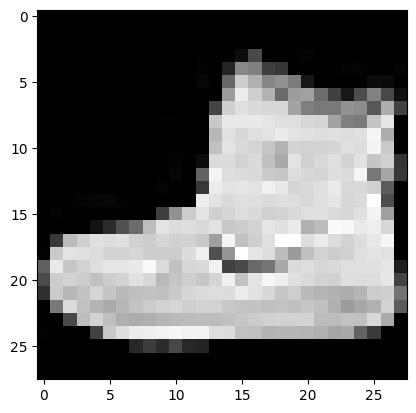

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")

In [ ]:
# Pass image through model
device
image.to(device)
model_2(image)

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument weight in method wrapper_CUDA___slow_conv2d_forward)

In [ ]:
# Print out image shape without unsqueeze (no need for this anyway it works fine in this version of pytorch)
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}" )

# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going thorugh conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")


Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 64, 64])
Shape after going thorugh conv_layer() and max_pool_layer(): torch.Size([1, 10, 32, 32])


In [ ]:
torch.manual_seed(42)

# Create random tensor with a similar number of dimensions to our images
random_tensor = torch.randn(size=(1,1,2,2))
print(f"\n Random tensor: \n{random_tensor}")
print(f"\n Random tensor shape: \n{random_tensor.shape}")
# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass random tensor through maxpool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\n Max pool tensor: {max_pool_tensor}")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")



 Random tensor: 
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])

 Random tensor shape: 
torch.Size([1, 1, 2, 2])

 Max pool tensor: tensor([[[[0.3367]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])
